## Exploratory Data Analysis for Titanic Dataset

### The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of all columns
* Basic Data exploration
* Rejecting useless columns
* Creating new columns
* Doing some experiments on different categorical columns with string value
* Visual Exploratory Data Analysis (Univariate Analysis & Bivariate Analysis)
* Outlier treatment
* Missing Values treatment
* Skewed Value treatement (**Logtransfrom, Square Transform, Reciprocal Transfrom**)

## Data description
The business meaning of each column in the data is as below

* <b>PassengerId</b>: The id for each passenger
* <b>Survived</b>: Whether the passenger survived or not? 1=Survived, 0=Died
* <b>Pclass</b>: The travel class of the passenger
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: The gender of the passenger
* <b>Age</b>: The Age of the passenger
* <b>SibSp</b>: Number of Siblings/Spouses Aboard
* <b>Parch</b>: Number of Parents/Children Aboard
* <b>Ticket</b>: The ticket number of the passenger
* <b>Fare</b>: The amount of fare paid by the passenger
* <b>Cabin</b>: The cabin number allotted
* <b>Embarked</b>: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [305]:
df = df_train.append(df_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10060\925505788.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [306]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Univeriate Analysis:

* Distribution Analysis
* Identifying Protential Issue

### Age

Conclusion: 

* Positive skewness
* Missing value 177
* Outlier Present in the data
* Graph is not normally distributed

<Axes: ylabel='Frequency'>

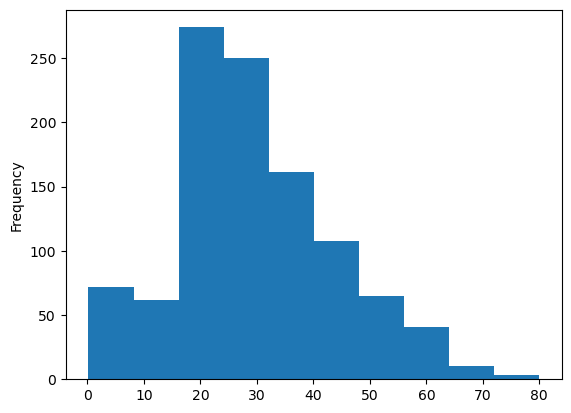

In [308]:
## Histogram
df['Age'].plot(kind = 'hist')

<Axes: ylabel='Density'>

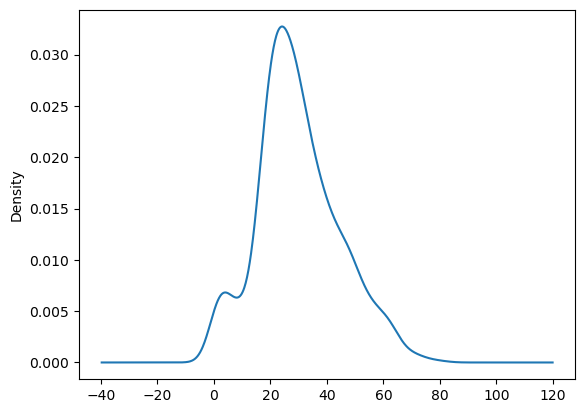

In [309]:
### KDE Plot
df['Age'].plot(kind = 'kde')

<Axes: >

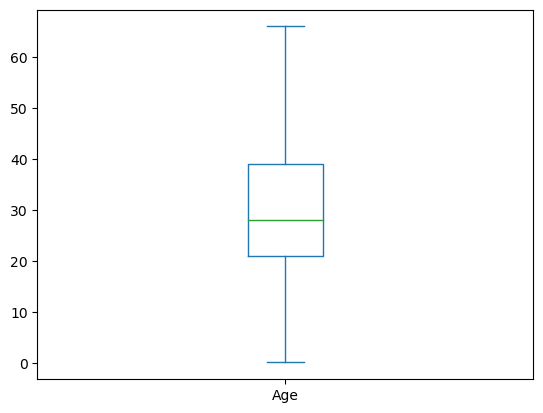

In [93]:
### Box Plot
df['Age'].plot(kind = 'box')

In [95]:
### Distribution
df['Age'].describe()

count    1309.000000
mean       29.747273
std        14.387791
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        66.000000
Name: Age, dtype: float64

In [312]:
## Checking Skewness
df['Age'].skew()

0.40767455974362266

### Missing value Treatement for Age Column

In [313]:
df['Age'].isnull().mean() ## Checking the percentage of missing value in Age column

0.20091673032849502

In [316]:
df['Age'][(df['Sex']=='female')&(~df['Age'].isnull())].mean().round(2) 
## Checking the mean value of female where age is not null

28.69

In [317]:
df['Age'][(df['Sex']=='male')&(~df['Age'].isnull())].mean().round(2)
## Checking the mean value of male where age is not null

30.59

In [318]:
## Filling the missing value of female with the help of random number imputation
df['Age'][(df['Sex']=='female') & (df['Age'].isnull())]= df['Age'][df['Sex']=='female'].dropna().sample(df['Age'][df['Sex']=='female'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp\ipykernel_10060\1966298444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][(df['Sex']=='female') & (df['Age'].isnull())]= df['Age'][df['Sex']=='female'].dropna().sample(df['Age'][df['Sex']=='female'].isnull().sum()).values


In [319]:
## Filling the missing value of male with the help of random number imputation
df['Age'][(df['Sex']=='male') & (df['Age'].isnull())]= df['Age'][df['Sex']=='male'].dropna().sample(df['Age'][df['Sex']=='male'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp\ipykernel_10060\1238189660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][(df['Sex']=='male') & (df['Age'].isnull())]= df['Age'][df['Sex']=='male'].dropna().sample(df['Age'][df['Sex']=='male'].isnull().sum()).values


### Outlier Treatement

In [320]:
### Checking the 25th & 75th percentile value
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [321]:
### Checking the Inter Quartile Range 
IQR = percentile75-percentile25

In [322]:
# Set the upper limit and Lower limit
upperlimit = percentile75+1.5*IQR
lowerlimit = percentile25-1.5*IQR

In [324]:
## Remove the outlier
df['Age'] = np.where(df['Age']>upperlimit, upperlimit, np.where(df['Age']<lowerlimit, lowerlimit, df['Age']))

<Axes: >

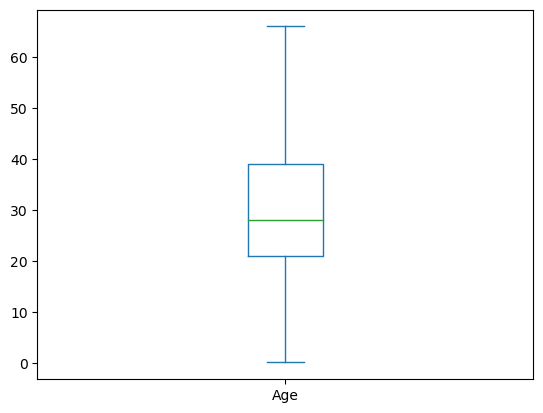

In [325]:
## Now checking that there is no outlier
df['Age'].plot(kind = 'box')

<Axes: ylabel='Density'>

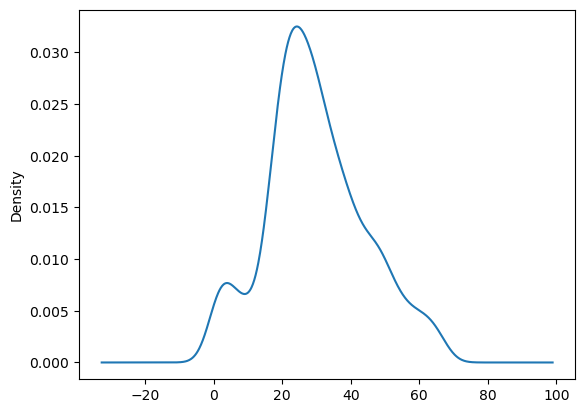

In [326]:
df['Age'].plot(kind = 'kde')

### Fare

* Skewness is available
* Missing value is available on one column

In [327]:
df['Fare'].describe() # Checking the description

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [329]:
df[df['Fare'].isnull()] ## Checking the missing value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### Create one new column that is family members 

In [330]:
df['familysize'] = df['SibSp']+df['Parch']+1 

### Creating the new column to check the Individual person fare

In [332]:
df['Fare_indi'] = np.where(df['familysize'] > 0, df['Fare']/df['familysize'], df['Fare'])

In [334]:
df.head() ## Checking the first 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Fare_indi
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000


In [337]:
df.isnull().sum() ## Checking the missing value for all columns

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
familysize        0
Fare_indi         1
dtype: int64

<Axes: ylabel='Density'>

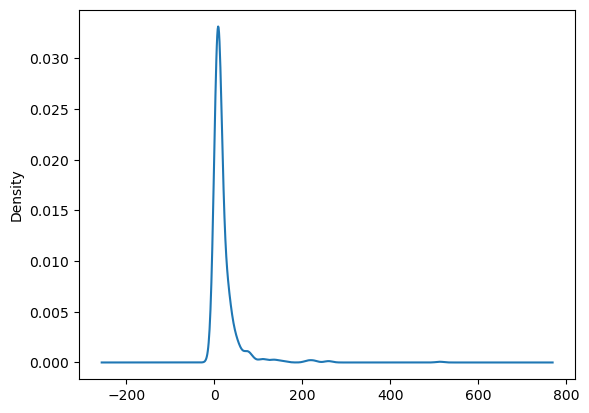

In [405]:
df['Fare_indi'].plot(kind = 'kde') ## KDE plot for new fare column

<Axes: ylabel='Frequency'>

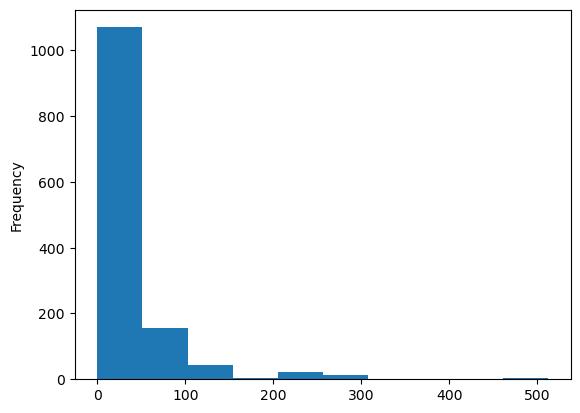

In [340]:
df['Fare'].plot(kind = 'hist') ## Histogram for new Fare column

<Axes: >

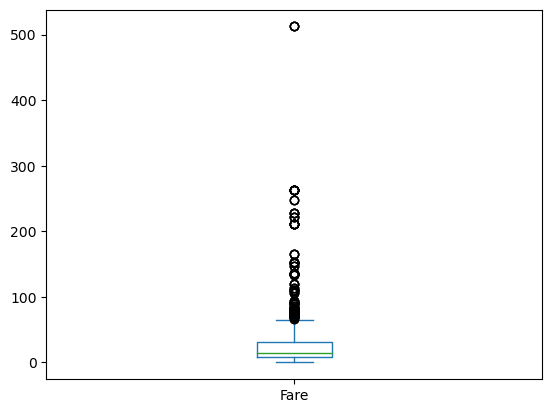

In [341]:
df['Fare'].plot(kind = 'box') ## Box plot for new Fare column

In [406]:
df['Fare_indi'].skew() ## Checking the skewness of new Fare column and it is right skewed

6.683189172409639

### Log Transform for Fare column

In [402]:
from sklearn.preprocessing import FunctionTransformer

In [403]:
lg = FunctionTransformer(func = np.log1p)

In [409]:
df1 = lg.fit_transform(df['Fare_indi'])

<Axes: ylabel='Frequency'>

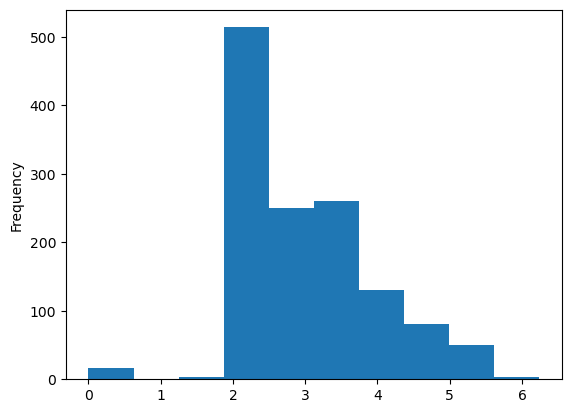

In [348]:
df1.plot(kind = 'hist')

### Square Transform for Fare column

In [410]:
def square(col):
    sq = FunctionTransformer(func = np.square)
    df1 = sq.fit_transform(df[col])
    
    
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    plt.title('Distribution before transformation')
    sns.histplot(df[col], kde = True, color = 'red')
    
    
    plt.subplot(1,2,2)
    plt.title('Distribution after transformation')
    sns.histplot(df1,kde = True)
    plt.xlabel(col)
    plt.show()
    
    print('Skewness before transformation {} and skewness after transformation {}'.format(df[col].skew(),df1.skew()))

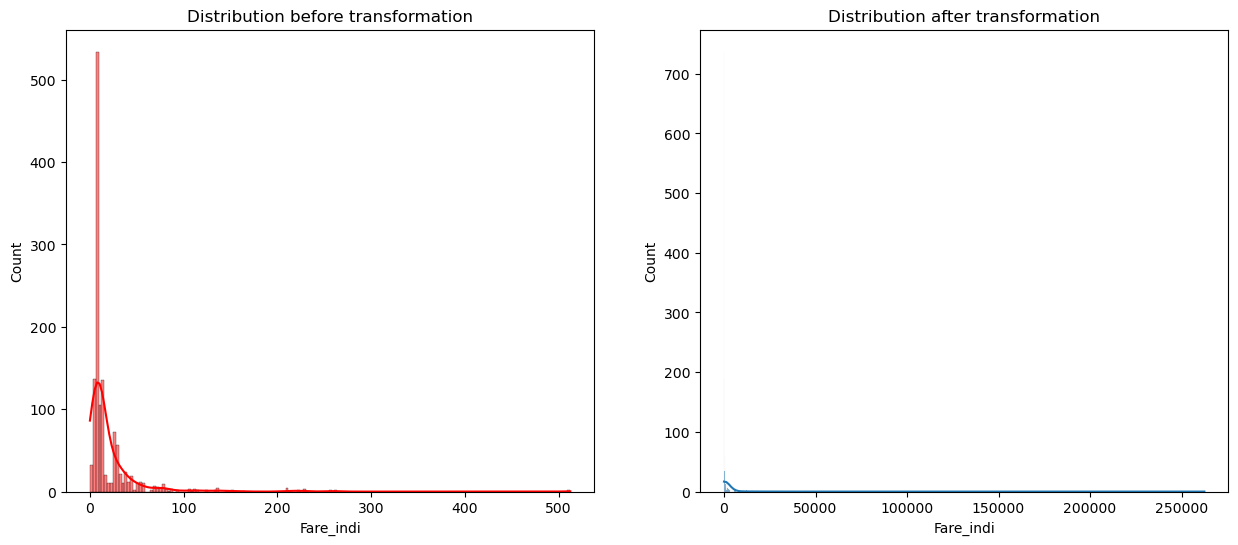

Skewness before transformation 6.683189172409639 and skewness after transformation 17.609387225638827


In [411]:
square(col = 'Fare_indi')

* Square transform is not possible for right skewed data as after transform value for skew is increasing

### Reciprocal Transform

In [468]:
def reci(col):
    rc = FunctionTransformer(func = lambda x :x**.2)
    df1 = rc.fit_transform(df[col])
    
    
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    plt.title('Distribution before transformation')
    sns.histplot(df[col], kde = True, color = 'red')
    
    
    plt.subplot(1,2,2)
    plt.title('Distribution after transformation')
    sns.histplot(df1,kde = True)
    plt.xlabel(col)
    plt.show()
    
    print('Skewness before transformation {} and skewness after transformation {}'.format(df[col].skew(),df1.skew()))

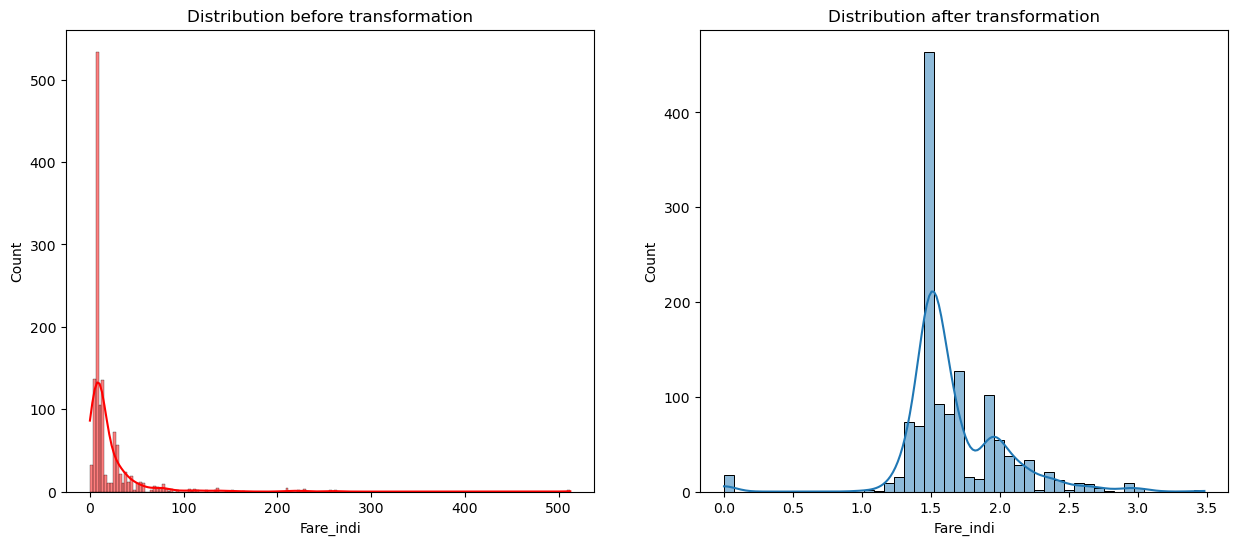

Skewness before transformation 6.683189172409639 and skewness after transformation 0.08128920091358781


In [469]:
df1 = reci(col = 'Fare_indi')

* It is clearly showing that reciprocal valur with **x to the power .2** is resulting less skewed

In [474]:
def reci1(col):
    rc = FunctionTransformer(func = lambda x :x**.2)
    df1 = rc.fit_transform(df[col])
    return df1

In [475]:
df1 = reci1(col = 'Fare_indi')

In [419]:
df1

0       1.903943
1       5.970063
2       2.815138
3       5.152669
4       2.837252
         ...    
413     2.837252
414    10.435516
415     2.692582
416     2.837252
417     2.729976
Name: Fare_indi, Length: 1309, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

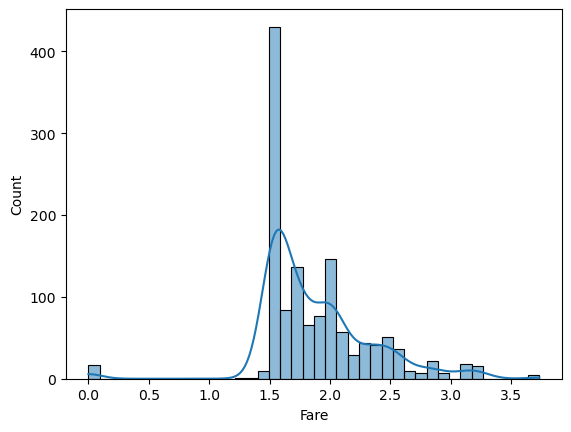

In [356]:
sns.histplot(df1, kde = True)

In [482]:
df1.skew()

0.08128920091358781

In [481]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,familysize,Fare_indi,Family_Size_Bucket,title,Prefix
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,NaN,S,2,3.62500,Small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C85,C,2,35.64165,Small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,NaN,S,1,7.92500,Small,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,C123,S,2,26.55000,Small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,NaN,S,1,8.05000,Small,Allen,Mr.


## Pclass

* Most of the people are travelling in 3rd class
* That is 54%

In [360]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [361]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

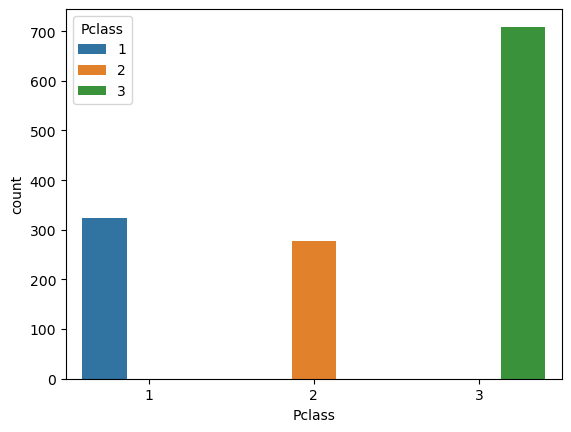

In [362]:
sns.countplot(x = df['Pclass'], hue = df['Pclass'])

Text(0, 0.5, 'Distribution')

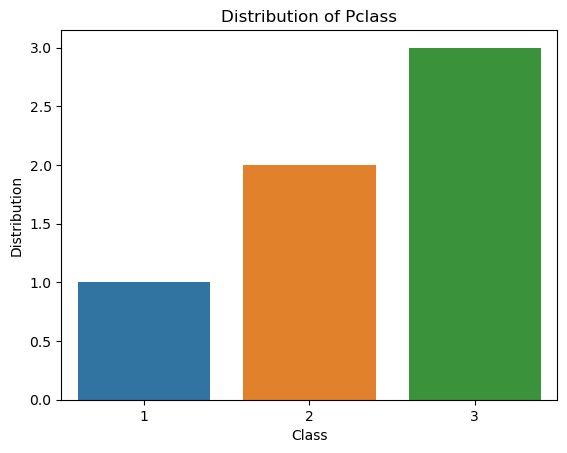

In [363]:
sns.barplot(data = df, x = 'Pclass', y = 'Pclass')
plt.title('Distribution of Pclass')
plt.xlabel('Class')
plt.ylabel('Distribution')

In [364]:
Classcount = df['Pclass'].value_counts().reset_index()

In [365]:
Classcount

,index,Pclass
0,3,709
1,1,323
2,2,277


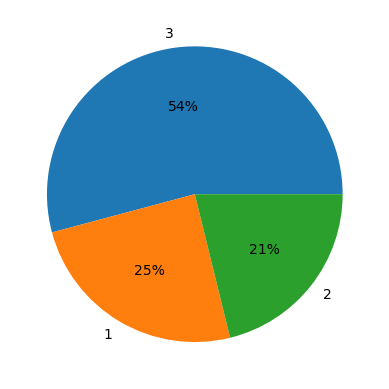

In [366]:
plt.pie(Classcount['Pclass'],labels = Classcount['index'], autopct = '%0.0f%%')

plt.show()

In [367]:
df['Pclass'].isnull().sum()

0

## Sex

* above 60% are male in titanic 

In [368]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [369]:
sex_count = df['Sex'].value_counts()

In [370]:
df1 = pd.DataFrame(sex_count).reset_index()
df1

,index,Sex
0,male,843
1,female,466


In [371]:
df1.rename(columns = {'index':'Sex','Sex':'Count'}, inplace = True)

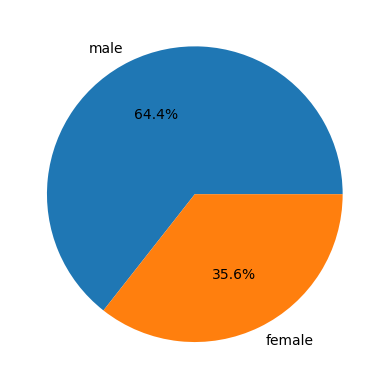

In [372]:
plt.pie(df1['Count'],labels = df1['Sex'], autopct = '%0.1f%%')
plt.show()

In [373]:
df['Sex'].isnull().sum()

0

In [375]:
df.columns ## Checking the columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Cabin', 'Embarked', 'familysize', 'Fare_indi'],
      dtype='object')

## Embarked

* People are mostly from three cities.
* S -  **Southampton**
* C - **Cherbourg**
* Q - **Queenstown**
* Most of the people are travelling from **Southampton**. near about 70%
* One missing value is there

In [376]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [377]:
embarked = df['Embarked'].value_counts().reset_index()

In [378]:
embarked

,index,Embarked
0,S,914
1,C,270
2,Q,123


In [379]:
embarked.rename(columns = {'index':'Embarked', 'Embarked':'Count'}, inplace = True)

In [380]:
embarked['Embarked']

0    S
1    C
2    Q
Name: Embarked, dtype: object

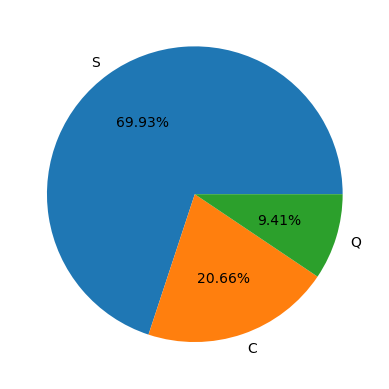

In [381]:
plt.pie(embarked['Count'], labels = embarked['Embarked'], autopct = '%0.2f%%')
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

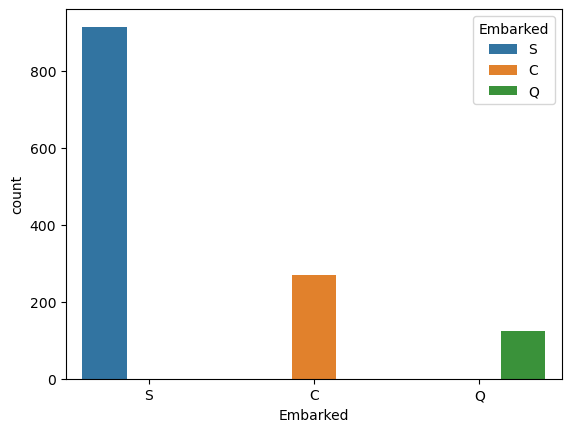

In [382]:
sns.countplot(x = df['Embarked'], hue= df['Embarked'])

### Missing value treatement for Embarked column that is Simple Imputation

In [383]:
from sklearn.impute import SimpleImputer

In [384]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [385]:
df['Embarked'] = imputer.fit_transform(df[['Embarked']])

In [386]:
imputer.statistics_

array(['S'], dtype=object)

In [387]:
df['Embarked'].isnull().sum()

0

In [388]:
## Creating New Column based on Family Size

In [609]:
df['Family_Size_Bucket'] = np.where(df['familysize']<=2,'Small',np.where((df['familysize']>2)&(df['familysize']<=4),'Medium','Large'))

In [610]:
df['Family_Size_Bucket']

0       Small
1       Small
2       Small
3       Small
4       Small
        ...  
413     Small
414     Small
415     Small
416     Small
417    Medium
Name: Family_Size_Bucket, Length: 1309, dtype: object

## Name

#### Spliting the Name column into three parts Prefix, Surname and FirstName

In [391]:
df["title"] = df['Name'].str.split(',').str.get(0)

In [392]:
df['Prefix'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [488]:
df['Prefix'] = np.where((df['Prefix']=='Dr.')&(df['Sex']=='male'), df['Prefix'].replace('Dr.','Mr.'), df['Prefix'].replace('Dr.','Mrs.'))

In [ ]:
df['Prefix'] = np.where((df['Prefix']=='Dr.')&(df['Sex']=='male'), df['Prefix'].replace('Dr.','Mr.'), df['Prefix'].replace('Dr.','Mrs.'))

In [485]:
df['Prefix'] = df['Prefix'].replace('Don.','Mr.')

In [486]:
df['Prefix'] = df['Prefix'].replace('Dona.','Mrs.')

In [491]:
df['Prefix'] = df['Prefix'].replace('Rev.','Mr.')

In [493]:
df['Prefix'] = df['Prefix'].replace('Miss.','Ms.')

In [494]:
df['Prefix'] = df['Prefix'].replace('Lady.','Ms.')

In [497]:
df['Prefix'] = df['Prefix'].replace('the','Ms.')

In [500]:
df['Prefix'] = df['Prefix'].replace('Sir.','Mr.')

In [503]:
df['Prefix'] = df['Prefix'].replace('Mme.','Mrs.')

In [508]:
df['Prefix'] = df['Prefix'].replace('Master.','Mr.')

In [511]:
df['Prefix'] = df['Prefix'].replace('Major.','Mr.')

In [515]:
df['Prefix'] = df['Prefix'].replace('Jonkheer.','Mr.')

In [518]:
df['Prefix'] = df['Prefix'].replace('Mlle.','Ms.')

In [522]:
df['Prefix'] = df['Prefix'].replace('Col.','Mr.')

In [524]:
df['Prefix'] = df['Prefix'].replace('Capt.','Mr.')

In [526]:
df['Name'] = df['Name'].str.split(',').str.get(1).str.strip().str.split('.').str.get(1)

In [527]:
df.isnull().sum()

PassengerId              0
Survived               418
Pclass                   0
Name                     0
Sex                      0
Age                      0
Ticket                   0
Cabin                 1014
Embarked                 0
familysize               0
Fare_indi                1
Family_Size_Bucket       0
title                    0
Prefix                   0
dtype: int64

## Survived

### Missing value treatement for Target variable Survived

In [558]:
df['Survived'].isnull().sum()

418

In [554]:
df['Survived'].isnull().sum()/len(df['Survived']) ### 32% missing value

0.31932773109243695

#### Filling the null value based on Prefix

In [559]:
df['Survived'][(df['Prefix']=='Mr.')&(df['Survived'].isnull())] = df['Survived'].fillna(value = df['Survived'][(~df['Survived'].isnull()) & (df['Prefix']=='Mr.')].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10060\196023822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived'][(df['Prefix']=='Mr.')&(df['Survived'].isnull())] = df['Survived'].fillna(value = df['Survived'][(~df['Survived'].isnull()) & (df['Prefix']=='Mr.')].mode()[0])


In [561]:
df['Survived'][(df['Prefix']=='Ms.')&(df['Survived'].isnull())] = df['Survived'].fillna(value = df['Survived'][(~df['Survived'].isnull()) & (df['Prefix']=='Ms.')].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10060\2322696389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived'][(df['Prefix']=='Ms.')&(df['Survived'].isnull())] = df['Survived'].fillna(value = df['Survived'][(~df['Survived'].isnull()) & (df['Prefix']=='Ms.')].mode()[0])


In [560]:
df['Survived'][(df['Prefix']=='Mrs.')&(df['Survived'].isnull())] = df['Survived'].fillna(value = df['Survived'][(~df['Survived'].isnull()) & (df['Prefix']=='Mrs.')].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10060\3676015450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived'][(df['Prefix']=='Mrs.')&(df['Survived'].isnull())] = df['Survived'].fillna(value = df['Survived'][(~df['Survived'].isnull()) & (df['Prefix']=='Mrs.')].mode()[0])


In [564]:
df['Survived'] = df['Survived'].astype(int) ## Convert the datatype of Survived column from float to int

In [563]:
df['Survived'].isnull().sum()

0

In [565]:
df['Survived'].value_counts()

0    815
1    494
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

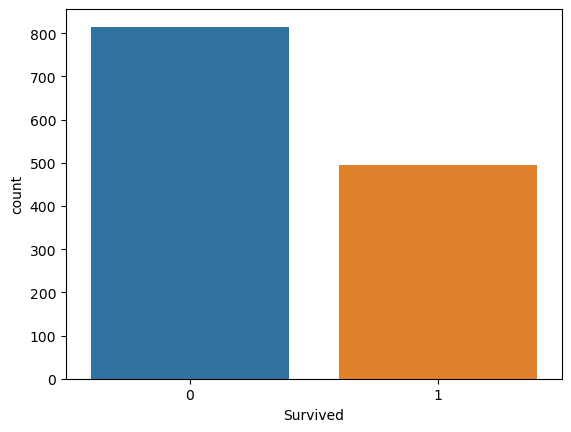

In [566]:
sns.countplot(x = df['Survived']) ## Count Plot

In [572]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Cabin', 'Embarked', 'familysize', 'Fare_indi', 'Family_Size_Bucket',
       'title', 'Prefix'],
      dtype='object')

## Cabin

* As Cabin column has more that 77% null value

In [575]:
df['Cabin'].isnull().sum()/len(df['Cabin'])*100

77.46371275783041

**As Cabin column has more that 77% missing value thats why we are droping this column from our dataset**

In [577]:
df.drop(columns = ['Cabin'], inplace = True)

## Prefix

In [578]:
df['Prefix'].isnull().sum()

0

<Axes: xlabel='Prefix', ylabel='count'>

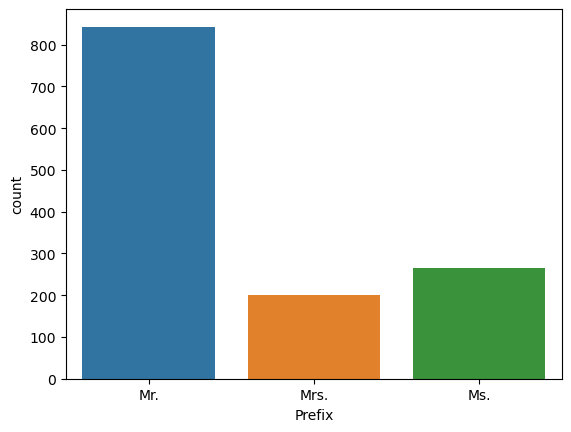

In [580]:
sns.countplot(data = df, x='Prefix') ## Count Plot

In [583]:
Prefix_frame = df['Prefix'].value_counts().reset_index()

In [588]:
Prefix_frame

,Prefix,Frequency
0,Mr.,843
1,Ms.,266
2,Mrs.,200


In [587]:
Prefix_frame.rename(columns = {'index':'Prefix', 'Prefix':'Frequency'}, inplace=True)

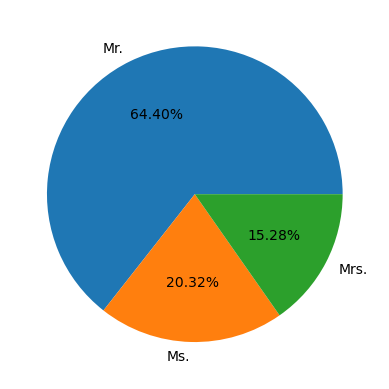

In [593]:
### Pie Chart
plt.pie(Prefix_frame['Frequency'], labels = Prefix_frame['Prefix'], autopct = '%.2f%%')
plt.show()

<Axes: xlabel='Prefix', ylabel='Frequency'>

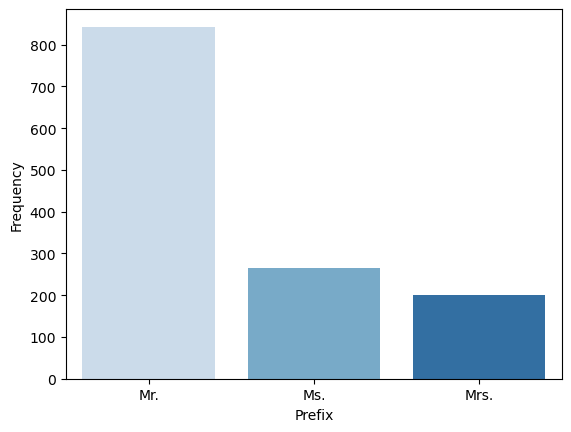

In [603]:
sns.barplot(data = Prefix_frame, x = 'Prefix', y = 'Frequency', palette = 'Blues') ## Barplot

## Family_Size_Bucket

In [619]:
bucket = df['Family_Size_Bucket'].value_counts().reset_index()
bucket.rename(columns = {'index':'Family_Bucket', 'Family_Size_Bucket':'Frequency'}, inplace = True)

In [620]:
bucket

,Family_Bucket,Frequency
0,Small,1025
1,Medium,202
2,Large,82


<Axes: xlabel='Family_Size_Bucket', ylabel='count'>

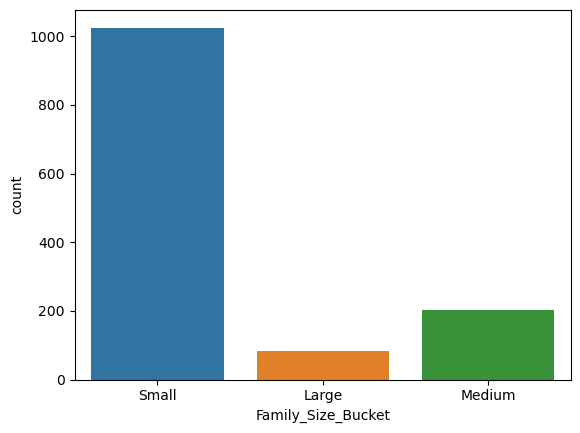

In [615]:
sns.countplot(data = df, x = 'Family_Size_Bucket')

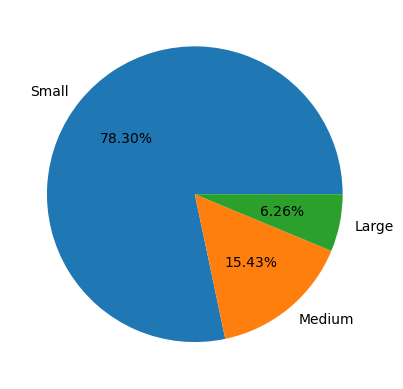

In [623]:
plt.pie(bucket['Frequency'], labels = bucket['Family_Bucket'], autopct = '%0.2f%%')
plt.show()

In [626]:
df.drop(columns = ['PassengerId'], inplace = True) ## Droping Unnessesery Column

### Rename the some of the columns

In [629]:
df.rename(columns = {'Fare_indi':'Fare'}, inplace = True)

In [633]:
df.rename(columns = {'Name':'Firstname'}, inplace = True)

In [631]:
df.rename(columns = {'Family_Size_Bucket':'Family Size', 'title':'Surname', 'familysize':'No of FamilyMembers', 'Sex':'Gender'}, inplace = True)

In [634]:
df.columns ## Checking the final column name

Index(['Survived', 'Pclass', 'Firstname', 'Gender', 'Age', 'Ticket',
       'Embarked', 'No of FamilyMembers', 'Fare', 'Family Size', 'Surname',
       'Prefix'],
      dtype='object')

## Missing value treatment for Fare Column

In [639]:
df[df['Fare'].isnull()]

,Survived,Pclass,Firstname,Gender,Age,Ticket,Embarked,No of FamilyMembers,Fare,Family Size,Surname,Prefix
152,0,3,Thomas,male,60.5,3701,S,1,NaN,Small,Storey,Mr.


In [640]:
df.groupby('Gender').agg({'Fare':'mean'})## Checking the mean fare based on gender

,Fare
Gender,
female,26.824981
male,17.027772


In [654]:
df['Fare'][(df['Age']>=60)&(df['Pclass']==3)&(~df['Fare'].isnull())].mean().round(4) 
## As the missing value is on Pclass 3 and Age greater than 60. So thats why checking the average fare corresponding to that age and class

7.4655

In [656]:
## Filling the missing value
df['Fare'].fillna(value = df['Fare'][(df['Age']>=60)&(df['Pclass']==3)&(~df['Fare'].isnull())].mean().round(4), inplace = True)

In [657]:
df.isnull().sum()

Survived               0
Pclass                 0
Firstname              0
Gender                 0
Age                    0
Ticket                 0
Embarked               0
No of FamilyMembers    0
Fare                   0
Family Size            0
Surname                0
Prefix                 0
dtype: int64

In [658]:
df.head()

,Survived,Pclass,Firstname,Gender,Age,Ticket,Embarked,No of FamilyMembers,Fare,Family Size,Surname,Prefix
0,0,3,Owen Harris,male,22.0,A/5 21171,S,2,3.62500,Small,Braund,Mr.
1,1,1,John Bradley (Florence Briggs Thayer),female,38.0,PC 17599,C,2,35.64165,Small,Cumings,Mrs.
2,1,3,Laina,female,26.0,STON/O2. 3101282,S,1,7.92500,Small,Heikkinen,Ms.
3,1,1,Jacques Heath (Lily May Peel),female,35.0,113803,S,2,26.55000,Small,Futrelle,Mrs.
4,0,3,William Henry,male,35.0,373450,S,1,8.05000,Small,Allen,Mr.


### Working on some experiment for Ticket column

In [ ]:
df['Ticket'].str.split().str.get(-1)
# extract numerical part
#df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

##### Dividing the String value and Numerical value from ticket number

In [680]:
df['Ticket_num'] = df['Ticket'].str.split().str.get(-1)
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'], errors = 'coerce',downcast = 'integer')

In [685]:
df['Ticket_cat'] = df['Ticket'].str.split().str.get(0)
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(), np.nan, df['Ticket_cat'])

In [702]:
df['Ticket_cat'].isnull().sum()

0

In [699]:
df['Ticket_num'].fillna(value = 0, inplace = True)

In [700]:
df['Ticket_num'].isnull().sum()

0

In [701]:
df['Ticket_cat'].fillna(value = 'Not Applicable', inplace = True)

In [98]:
##df1 = df.to_csv('Copy_train.csv')

In [99]:
##import os

In [100]:
##os.getcwd()

'C:\\Users\\DELL\\Untitled Folder 2'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Copy_Train.csv')

In [92]:
df.head()

,Survived,Pclass,Firstname,Gender,Age,Embarked,No of FamilyMembers,Fare,Family Size,Surname,Prefix
0,0,3,Owen Harris,male,22.0,S,2,3.62500,Small,Braund,Mr.
1,1,1,John Bradley (Florence Briggs Thayer),female,38.0,C,2,35.64165,Small,Cumings,Mrs.
2,1,3,Laina,female,26.0,S,1,7.92500,Small,Heikkinen,Ms.
3,1,1,Jacques Heath (Lily May Peel),female,35.0,S,2,26.55000,Small,Futrelle,Mrs.
4,0,3,William Henry,male,35.0,S,1,8.05000,Small,Allen,Mr.


## Biveriate Analysis 


* Target Veriable = Survived

### Box plot

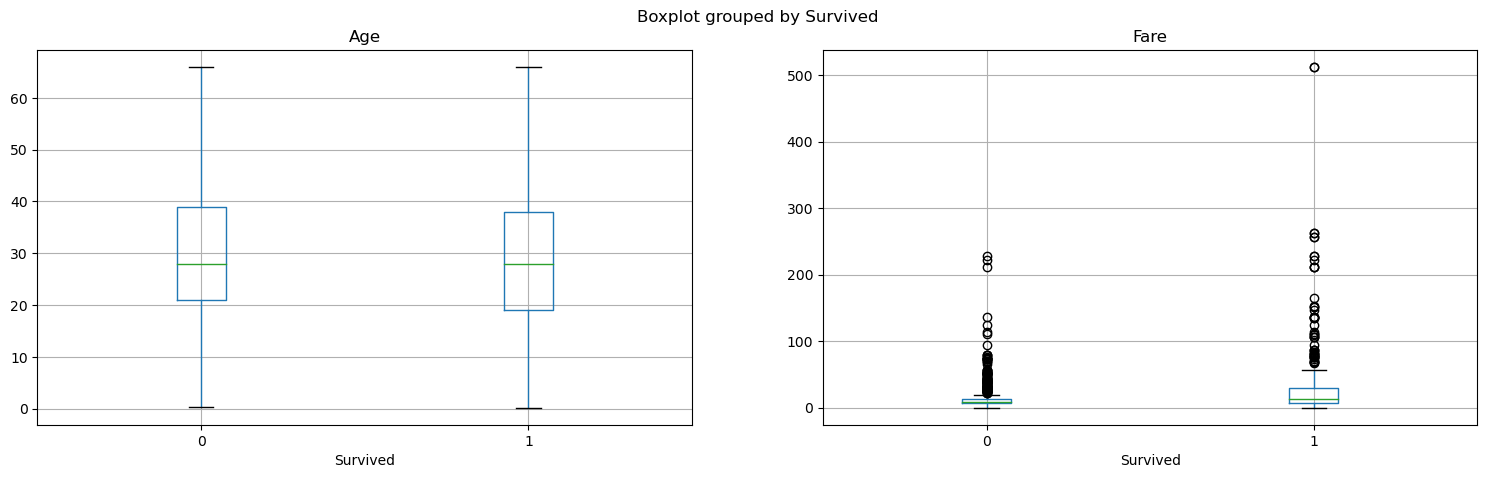

In [6]:
continuouscol = ['Age','Fare']

fig,plot = plt.subplots(nrows = 1, ncols = len(continuouscol), figsize = (18,5))

for plotcum, i in zip(continuouscol, range(len(continuouscol))):
    df.boxplot(column = plotcum, by = 'Survived', figsize = (5,5), vert= True, ax = plot[i])
    

### Box Plot Interpretation


* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* Here the first chart "Age" Vs "Survived". The boxes are in the same line! It means that people who have survived the crash and those who did not survive the crash have similar kind of ages. Hence, I cannot distinguish between survival and non-survival effectively based on the Age. So this column is NOT correlated with the Survived.

* The other chart exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of survival. It hints that these variables might be correlated with Survived.

### KDE Plot

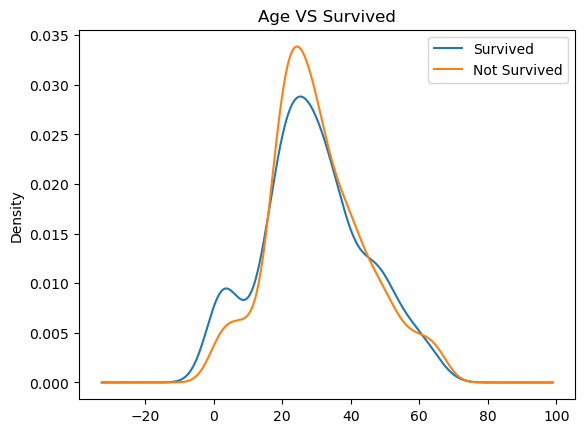

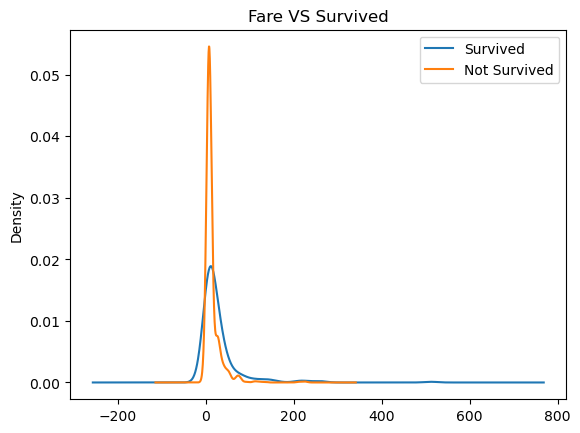

In [70]:
continuouscol = ['Age','Fare']

for i in continuouscol:
    plt.title(i+' VS '+'Survived')
    df[df['Survived']==1][i].plot(kind = 'kde', label = 'Survived')
    df[df['Survived']==0][i].plot(kind = 'kde', label = 'Not Survived')
    plt.legend()
    plt.show()
    

### KDE Plot Interpretation


* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(KDE are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* Here the first chart "Age" Vs "Survived". The KDE are approximately in the same line! It means that people who have survived the crash and those who did not survive the crash have similar kind of ages. Hence, I cannot distinguish between survival and non-survival effectively based on the Age. So this column is NOT correlated with the Survived.

* The other chart exhibit opposite characteristics. Means the the data distribution is different(the KDE line are not in the same line) for each category of survival. It hints that these variables might be correlated with Survived.

### Violin Graph

Text(0.5, 1.0, 'Age VS Survived')

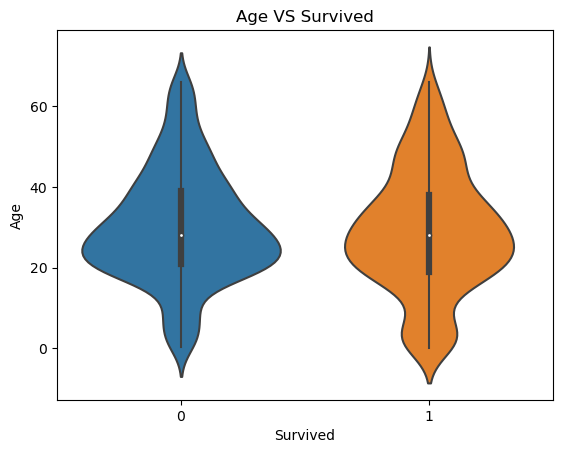

In [82]:
sns.violinplot(data = df, x = 'Survived', y = 'Age')
plt.title('Age VS Survived')

Text(0.5, 1.0, 'Fare VS Survived')

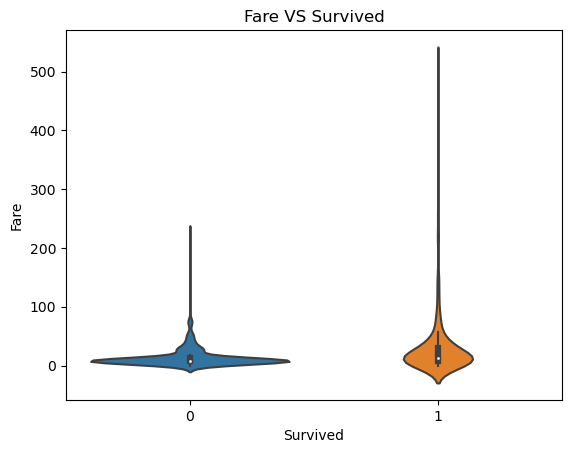

In [71]:
sns.violinplot(data = df, x = 'Survived', y = 'Fare')
plt.title('Fare VS Survived')

### Violin Plot Interpretation


* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Violin are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* Here the first chart "Age" Vs "Survived". The KDE are approximately in the same line! It means that people who have survived the crash and those who did not survive the crash have similar kind of ages. Hence, I cannot distinguish between survival and non-survival effectively based on the Age. So this column is NOT correlated with the Survived.

* The other chart exhibit opposite characteristics. Means the the data distribution is different(the Violin are not in the same line) for each category of survival. It hints that these variables might be correlated with Survived.

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Firstname', 'Gender', 'Age', 'Ticket',
       'Embarked', 'No of FamilyMembers', 'Fare', 'Family Size', 'Surname',
       'Prefix', 'Ticket_num', 'Ticket_cat'],
      dtype='object')

### Dropping the Unnessery Columns

In [9]:
df.drop(columns = ['Ticket', 'Ticket_num', 'Ticket_cat'], inplace = True)

### Bar Plot

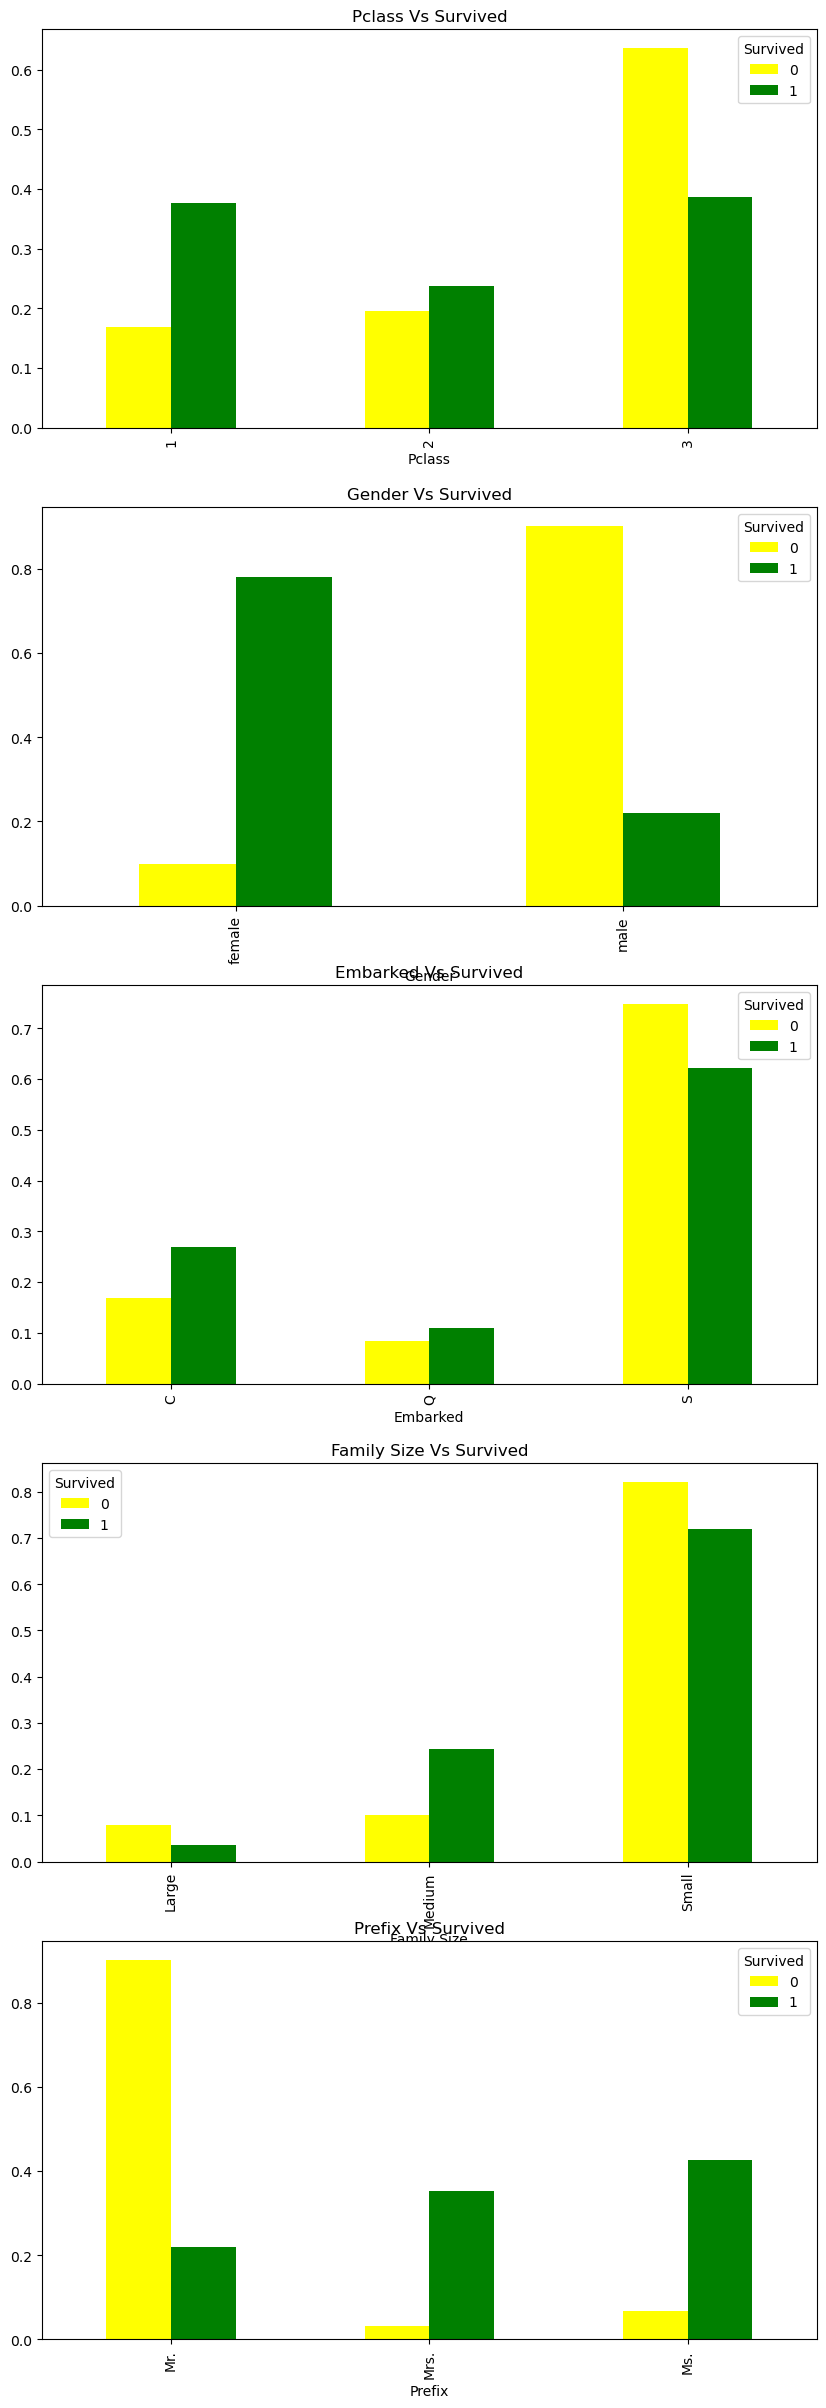

In [57]:
catcol = ['Pclass','Gender','Embarked','Family Size','Prefix']

fig, plot = plt.subplots(nrows =len(catcol), ncols = 1, figsize = (10,30))

for plotnum,i in zip(catcol, range(len(catcol))):
    crosstab1 = pd.crosstab(index = df[plotnum], columns = df['Survived'], normalize = 'columns')
    crosstab1.plot.bar(color = ['yellow','green'], ax = plot[i], title=plotnum+' Vs '+'Survived')

### Stacked Bar Plot

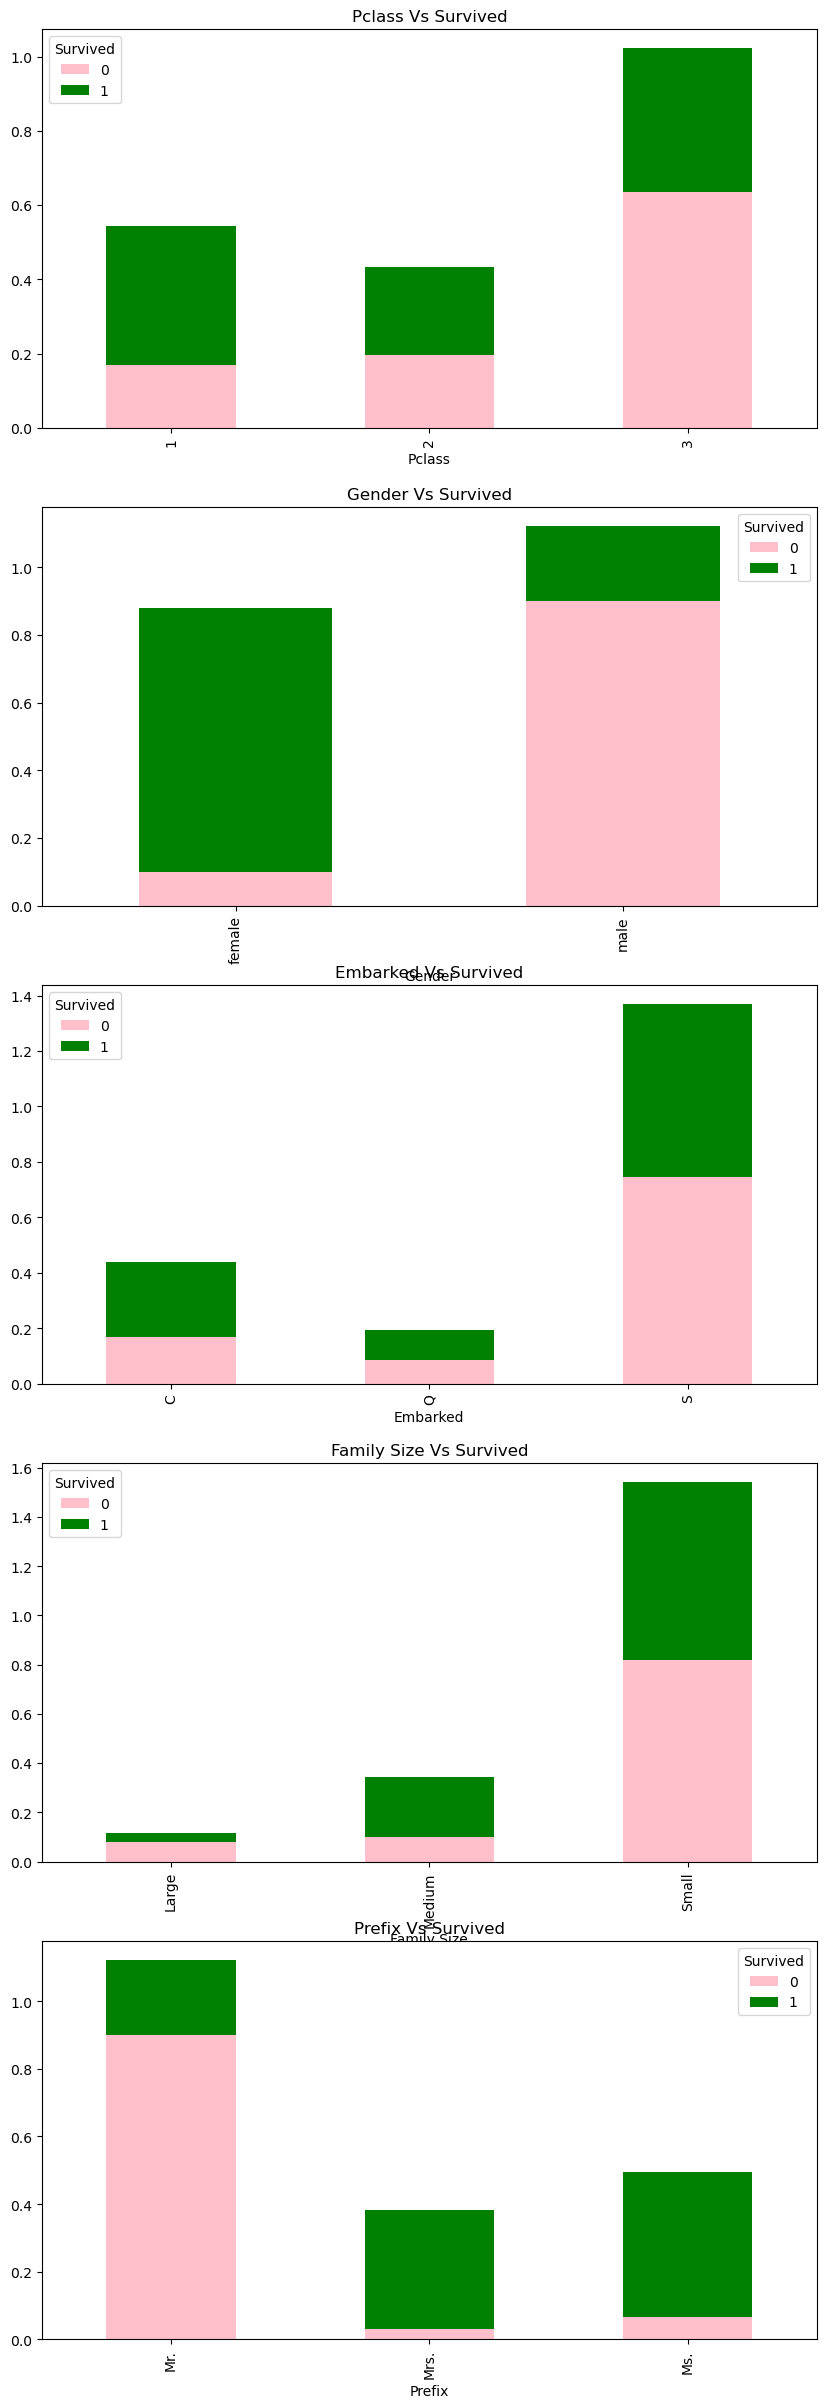

In [39]:
catcol = ['Pclass','Gender','Embarked','Family Size','Prefix']

fig, plot = plt.subplots(nrows =len(catcol), ncols = 1, figsize = (10,30))

for plotnum,i in zip(catcol, range(len(catcol))):
    crosstab1 = pd.crosstab(index = df[plotnum], columns = df['Survived'], normalize = 'columns')
    crosstab1.plot.bar(color = ['pink','green'],stacked = True, ax = plot[i], title=plotnum+' Vs '+'Survived')

### Heat Map

Text(0.5, 1.0, 'Pclass vs Survived')

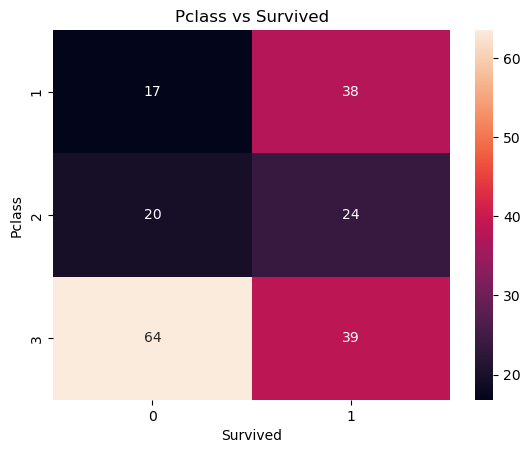

In [90]:
sns.heatmap(pd.crosstab(index = df['Pclass'], columns = df['Survived'], normalize = 'columns')*100, annot = True)
plt.title('Pclass vs Survived')

* This is the heat map of **Pclass vs Survived** 
* The graph is clearly showing that most of the people are not surviving who booked the ticket for class 3. It means at the time of the crush those people were from class 1 they were rescued 1st from that place. 

Text(0.5, 1.0, 'Prefix vs Survived')

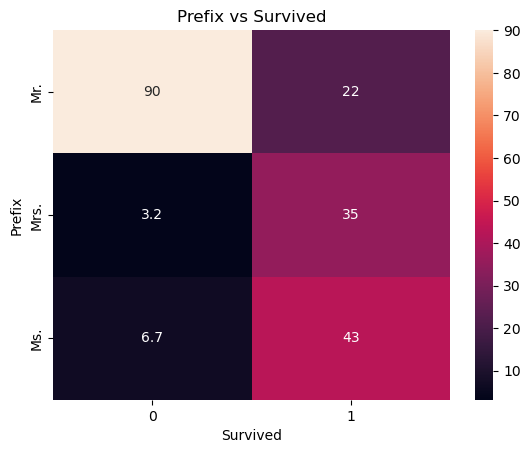

In [89]:
sns.heatmap(pd.crosstab(index = df['Prefix'], columns = df['Survived'], normalize = 'columns')*100, annot = True)
plt.title('Prefix vs Survived')

* This is the heat map of **Prefix vs Survived** 

Text(0.5, 1.0, 'Gender vs Survived')

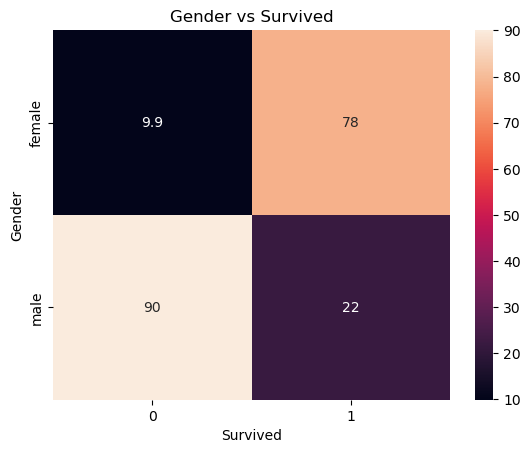

In [88]:
sns.heatmap(pd.crosstab(index = df['Gender'], columns = df['Survived'], normalize = 'columns')*100, annot = True)
plt.title('Gender vs Survived')

* This is the heat map of **Gender vs Survived** 
* This map is clearly showing that 90% of male are not survived the crush

Text(0.5, 1.0, 'Embarked vs Survived')

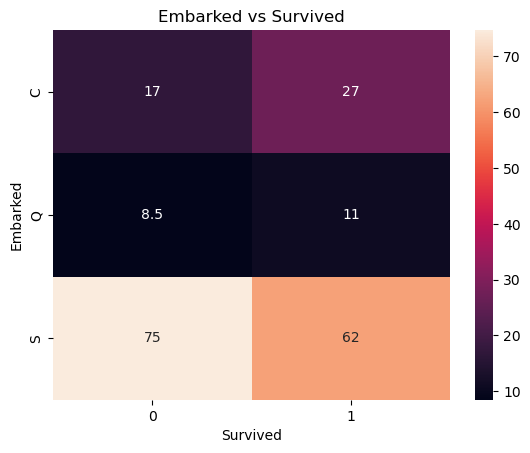

In [85]:
sns.heatmap(pd.crosstab(index = df['Embarked'], columns = df['Survived'], normalize = 'columns')*100, annot = True)
plt.title('Embarked vs Survived')

* this is **Embarked vs Survived**
* S - Southampton, C - Cherbourg, and Q - Queenstown.
* People who are from **Southampton** they are not survived are it is clearly showing that most of the people are travelling from **Southampton**

Text(0.5, 1.0, 'FamilySize vs Survived')

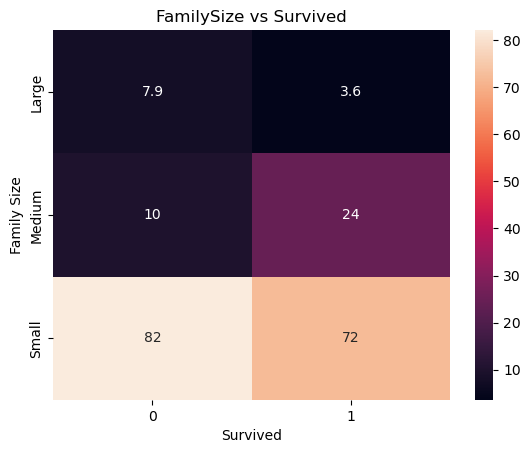

In [84]:
sns.heatmap(pd.crosstab(index = df['Family Size'], columns = df['Survived'], normalize = 'columns')*100, annot = True)
plt.title('FamilySize vs Survived')

* This is graph of **Family Size VS Survived**
* This graph is clearly showing that most of the people who are travelling in Titanic they are either one or two members together.
* Clearly it is showing that peoples are from small family they are not surviving.

## Conclusion:

The results are eye-opening: survival is not dependent on age, but nearly dependent on fare. Most people who died were from class 3, while those from class 1 were rescued first. Solo travellers were less likely to survive, and 90% of males did not survive. It's also worth noting that most people travelling from Southampton did not survive. 